# We've Got It Under Control

### Codercise 1.13.1

In [1]:
import pennylane as qml
import numpy as np

dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4


@qml.qnode(device=dev)
def true_cz(phi, theta, omega):

    # prepare_states(phi, theta, omega)

    # IMPLEMENT THE REGULAR CZ GATE HERE
    qml.CZ(wires=[0, 1])

    return qml.state()


@qml.qnode(dev)
def imposter_cz(phi, theta, omega):
    
    # prepare_states(phi, theta, omega)

    # IMPLEMENT CZ USING ONLY H AND CNOT
    qml.Hadamard(1)
    qml.CNOT(wires=[0, 1])
    qml.Hadamard(1)
    
    return qml.state()


print(f"True CZ output state {true_cz(phi, theta, omega)}")
print(f"Imposter CZ output state {imposter_cz(phi, theta, omega)}")


True CZ output state [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
Imposter CZ output state [1.+0.j 0.+0.j 0.+0.j 0.+0.j]


### Codercise 1.13.2

In [2]:
dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4


@qml.qnode(dev)
def apply_swap(phi, theta, omega):
    
    # prepare_states(phi, theta, omega)
    qml.SWAP(wires=[0,1])
    
    return qml.state()


@qml.qnode(dev)
def apply_swap_with_cnots(phi, theta, omega):
    
    # prepare_states(phi, theta, omega)
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,0])
    qml.CNOT(wires=[0,1])

    return qml.state()


print(f"Regular SWAP state = {apply_swap(phi, theta, omega)}")
print(f"CNOT SWAP state = {apply_swap_with_cnots(phi, theta, omega)}")


Regular SWAP state = [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
CNOT SWAP state = [1.+0.j 0.+0.j 0.+0.j 0.+0.j]


### Codercise 1.13.3

In [3]:
dev = qml.device("default.qubit", wires=3)

# Prepare first qubit in |1>, and arbitrary states on the second two qubits
phi, theta, omega = 1.2, 2.3, 3.4


# A helper function just so you can visualize the initial state
# before the controlled SWAP occurs.
@qml.qnode(dev)
def no_swap(phi, theta, omega):

    # prepare_states(phi, theta, omega)
    return qml.state()


@qml.qnode(dev)
def controlled_swap(phi, theta, omega):

    # prepare_states(phi, theta, omega)

    qml.Toffoli(wires = [0,1,2])
    qml.Toffoli(wires = [0,2,1])
    qml.Toffoli(wires = [0,1,2])

    return qml.state()


print(no_swap(phi, theta, omega))
print(controlled_swap(phi, theta, omega))


[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


### Codercise 1.13.4

In [4]:
dev = qml.device("default.qubit", wires=4)


@qml.qnode(dev)
def four_qubit_mcx():

    # IMPLEMENT THE CIRCUIT ABOVE USING A 4-QUBIT MULTI-CONTROLLED X
    qml.Hadamard(0)
    qml.Hadamard(1)
    qml.Hadamard(2)
    qml.MultiControlledX(control_wires=[0, 1, 2], wires=3, control_values="001")
    

    return qml.state()


print(four_qubit_mcx())


[0.35355339+0.j 0.        +0.j 0.        +0.j 0.35355339+0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j]


c:\Users\Ahmed\miniconda3\envs\QML_Proj\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:1045: PennyLaneDeprecationWarning: Specifying control values using a bitstring is deprecated, and will not be supported in future releases, Use a list of booleans or integers instead.
  warnings.warn(
c:\Users\Ahmed\miniconda3\envs\QML_Proj\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:1051: UserWarning: The control_wires keyword for MultiControlledX is deprecated, and will be removed soon. Use wires = (*control_wires, target_wire) instead.
  warnings.warn(


### Codercise 1.13.5

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j
 0.+0.j 0.+0.j]


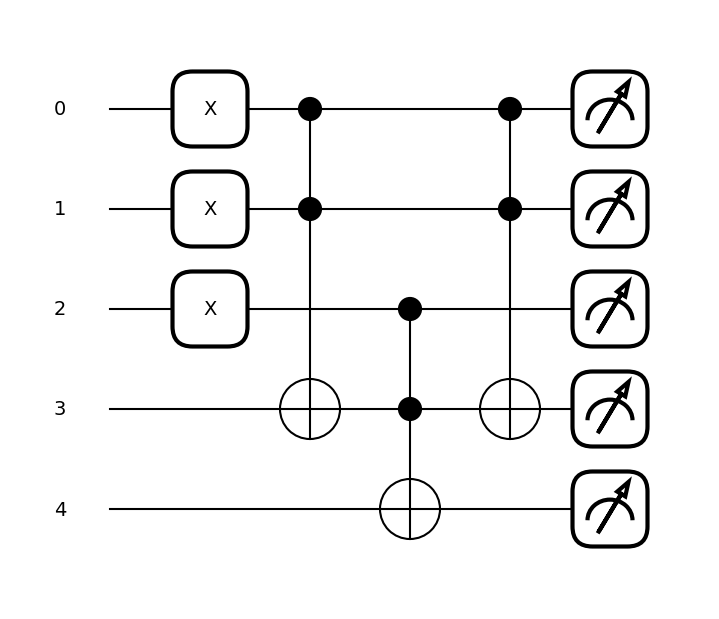

In [5]:
# Wires 0, 1, 2 are the control qubits
# Wire 3 is the auxiliary qubit
# Wire 4 is the target
dev = qml.device("default.qubit", wires=5)


@qml.qnode(dev)
def four_qubit_mcx_only_tofs():

    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.PauliX(wires=2)

    qml.Toffoli([0, 1, 3])
    qml.Toffoli([2, 3, 4])
    qml.Toffoli([0, 1, 3])

    return qml.state()

qml.draw_mpl(four_qubit_mcx_only_tofs)();

print(four_qubit_mcx_only_tofs())
